In [246]:
import math

import numpy as np
from skimage import transform
from skimage.data import astronaut
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import Resize
from torchvision.transforms.functional import _get_inverse_affine_matrix

from he.data.bounded_affine import get_corners, get_rot_mat
from he.data.maxrect import get_intersection, get_maximal_rectangle
from he.data.new_transforms import RandomAffine

In [180]:
image = Image.fromarray(astronaut())

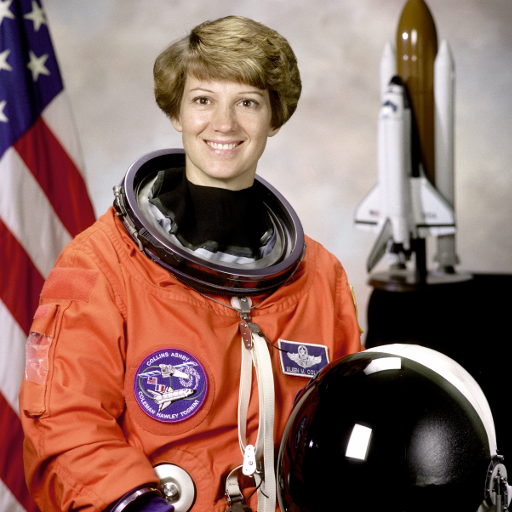

In [181]:
image

In [317]:
degrees = 45
translate = (0.25, 0.25)
scale = (0.7, 1.3)
shear = [-25, 25, -25, 25]

random_affine = RandomAffine(
    degrees=degrees,
    translate=translate,
    scale=scale,
    shear=shear
)

In [318]:
xt, params = random_affine(image)
angle, (tx, ty), scale, shear = params
print(params)

(29.221082215867042, (116.0, -46.0), 0.8817229014594763, [12.451611721723452, 3.6260283660606696])


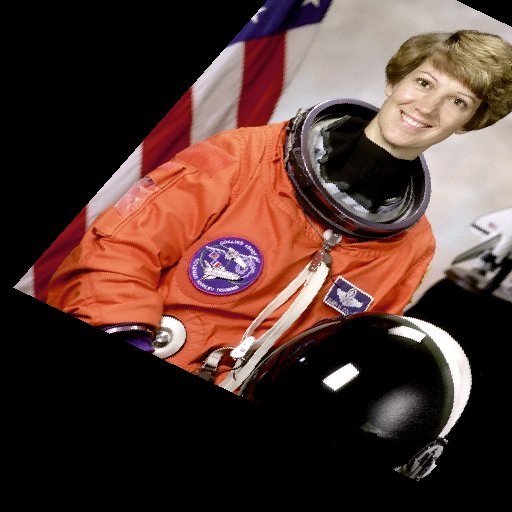

In [319]:
xt

In [320]:
image_np = np.asarray(image)
height, width = image_np.shape[:2]

center = (image.size[0] * 0.5 + 0.5, image.size[1] * 0.5 + 0.5)
matrix = _get_inverse_affine_matrix(center, angle, [tx, ty], scale, shear, inverted=False)

transformation_matrix = transform.AffineTransform(
    matrix=np.array(matrix + [0, 0, 1]).reshape(3, 3)
)

warped = transform.warp(image_np, transformation_matrix.inverse)

original_corners = get_corners(image_np)
transformed_corners = transformation_matrix(original_corners)

coordinates1 = [(x, y) for x, y in transformed_corners]
_, coordinates = get_intersection([coordinates1, ])
(x4, y4), (x2, y2) = get_maximal_rectangle(list(coordinates))
x1 = int(x4)
y1 = int(y2)
x3 = int(x2)
y3 = int(y4)
aa = (np.clip(x1, 0, width), np.clip(y1, 0, height))
bb = (np.clip(x3, 0, width), np.clip(y3, 0, height))
new = Image.fromarray((warped[bb[1]:aa[1], aa[0]:bb[0]] * 255.0).astype('uint8'))

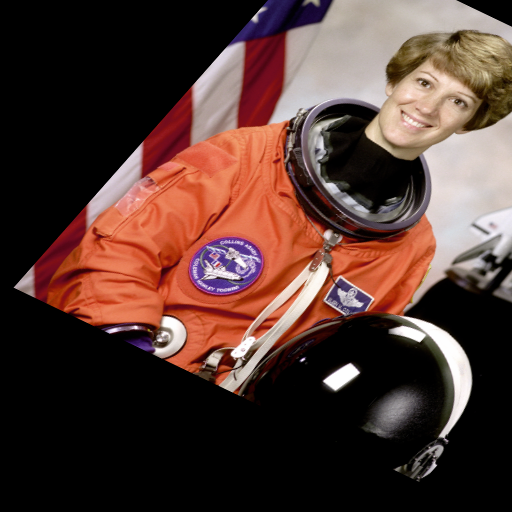

In [321]:
Image.fromarray((warped * 255).astype('uint8'))

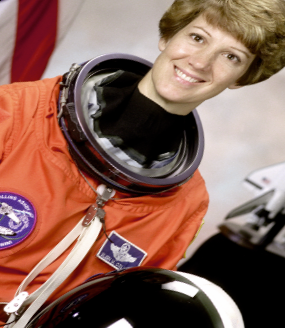

In [322]:
new

In [289]:
# image_np = np.asarray(image)
# height, width = image_np.shape[:2]
# 
# transformation_matrix = get_rot_mat(angle, image_np) + transform.AffineTransform(
#     scale=scale, translation=(tx, ty), shear=np.deg2rad(shear[0])
# )
# 
# warped = transform.warp(image_np, transformation_matrix.inverse)
# 
# original_corners = get_corners(image_np)
# transformed_corners = transformation_matrix(original_corners)
# 
# coordinates1 = [(x, y) for x, y in transformed_corners]
# _, coordinates = get_intersection([coordinates1, ])
# (x4, y4), (x2, y2) = get_maximal_rectangle(list(coordinates))
# x1 = int(x4)
# y1 = int(y2)
# x3 = int(x2)
# y3 = int(y4)
# aa = (np.clip(x1, 0, width), np.clip(y1, 0, height))
# bb = (np.clip(x3, 0, width), np.clip(y3, 0, height))
# new = Image.fromarray((warped[bb[1]:aa[1], aa[0]:bb[0]] * 255.0).astype('uint8'))